In [1]:
import df_model as df
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sps, phot = df.load_training_data(150600000)

Loading Training Data (1/2)
Loading Training Data (2/2)


In [3]:
sps, phot = df._get_subsample_of_data(sps, phot, 20000000)
colours, labels, redshifts = df.prepare_data(sps, phot)
train_dataset, test_dataset, train_size, test_size = df.create_test_validation_data(colours, labels, 0.9, 1000)
model = df.train_model(sps, phot, 32, 0.9, 1000)

Use 10 thread(s) for training
Use /var/folders/s9/j1tshp4s5019kbkk8hz2q9840000gn/T/tmpluk62tcn as temporary training directory
Reading training dataset...
Training tensor examples:
Features: Tensor("data:0", shape=(None, 5), dtype=float64)
Label: Tensor("data_1:0", shape=(None,), dtype=float64)
Weights: None
Normalized tensor features:
 {'data:0.0': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'strided_slice:0' shape=(None,) dtype=float32>), 'data:0.1': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'strided_slice_1:0' shape=(None,) dtype=float32>), 'data:0.2': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'strided_slice_2:0' shape=(None,) dtype=float32>), 'data:0.3': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'strided_slice_3:0' shape=(None,) dtype=float32>), 'data:0.4': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'strided_slice_4:0' shape=(None,) dtype=float32>)}
Training dat

INFO:tensorflow:Assets written to: saved_models/test_32_711553/assets


72/72 [==============================] - 3s 34ms/step - loss: 0.0000e+00 - accuracy: 0.9801
loss: 0.0000
accuracy: 0.9801


72/72 [==============================] - 3s 31ms/step
tf.Tensor(
[[65299   474]
 [  940  4443]], shape=(2, 2), dtype=int32)
72/72 [==============================] - 3s 31ms/step
efficency(%):  82.53761842838566
purity(%):  90.35997559487492
interloper fraction(%):  2.684563758389262


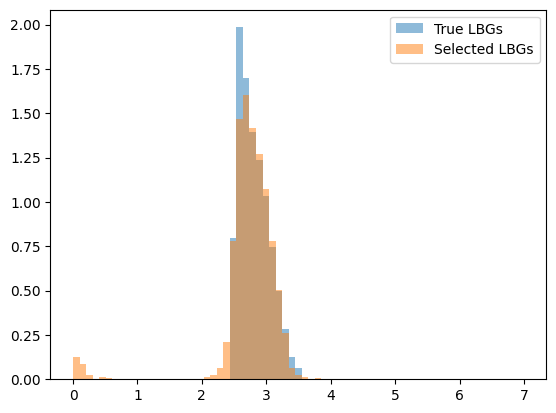

In [4]:
z_bins = np.linspace(0.0, 7.0, 70)
confidence = 0.5
original_objects = df.get_binned_nz(redshifts[train_size:])
selected_objects = df.get_optimised_nz(model, test_dataset, redshifts[train_size:], confidence)
plt.hist(original_objects, density=True, label="True LBGs", bins=z_bins, alpha=0.5)
plt.hist(selected_objects, density=True, label="Selected LBGs", bins=z_bins, alpha=0.5)
plt.legend()
selected_objects.shape[0]
df.evaluate_model_performance(model, test_dataset, redshifts[train_size:], labels[train_size:], confidence)

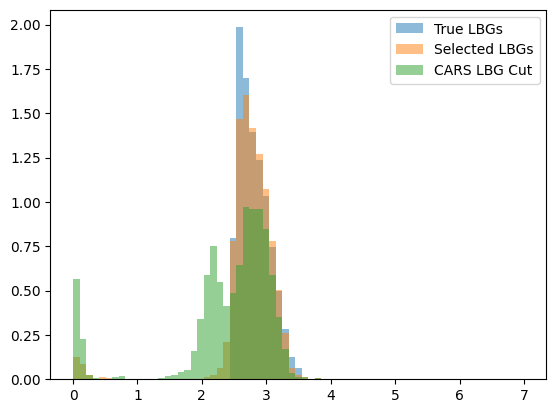

In [5]:
selected_lbgs_trad = df.get_classic_udropouts(colours[train_size:], redshifts[train_size:])
plt.hist(original_objects, density=True, label="True LBGs", bins=z_bins, alpha=0.5)
plt.hist(selected_objects, density=True, label="Selected LBGs", bins=z_bins, alpha=0.5)
plt.hist(selected_lbgs_trad, bins=z_bins, label="CARS LBG Cut", density=True, alpha=0.5)
plt.legend()